# Peru road to Russia World Cup 2018
![world-cup-18](snapshot/fifa-world-cup-2018.jpg)

In [1]:
# Cargamos las librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Formateamos una vista legible
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Preprocessing FIFA DATA
## Load Data from [SOFIFA]

[SOFIFA]: <https://sofifa.com>

In [2]:
# Data públicada en Enero en Kaggle
FIFA18 = pd.read_csv('CompleteDataset.csv', low_memory=False)
FIFA18.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

Indicamos los features a trabajar, dejando a un lado el resto

In [3]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
FIFA18 = pd.DataFrame(FIFA18, columns=interesting_columns)

## Summarize Data

In [4]:
# Vista de la data
FIFA18.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK


In [5]:
# Descripción de los features
FIFA18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Nationality            17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Preferred Positions    17981 non-null object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


## Preprocess Data
Cambiamos los vaores de "Value" & "Wage", extrayendo los miles y millones, tienendo los valores numéricos. Los cuales son almacenados en nuevos features 'ValueNum' y 'WageNum'.

In [6]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
FIFA18['ValueNum'] = FIFA18['Value'].apply(lambda x: str2number(x))
FIFA18['WageNum'] = FIFA18['Wage'].apply(lambda x: str2number(x))

Sintetizamos el feature 'Preferred  Positions' extrayendo únicamente el primer cáracter, omitiendo así la doble posición del jugador

In [7]:
FIFA18['Position'] = FIFA18['Preferred Positions'].str.split().str[0]

Seleccionamos el Grupo donde se encuentra nuestro Perú, Grupo C : \['Francia','Dinamarca','Perú','Australia'\].

In [8]:
GroupC = FIFA18[FIFA18.Nationality.isin(['France','Denmark','Peru','Australia'])]

Extraemos las medias de los salarios por nacionalidad para el GrupoC

In [9]:
GroupC_Average = FIFA18.groupby('Nationality').agg({'ValueNum':np.mean,'WageNum':np.mean})
GroupC_Average = GroupC_Average.reindex(['France','Denmark','Peru','Australia'])
GroupC_Average

,ValueNum,WageNum
Nationality,,
France,3.340557e+06,14279.141104
Denmark,1.596257e+06,7202.312139
Peru,2.178167e+06,6500.000000
Australia,7.339868e+05,4114.537445


# Data Visualization
## Age

Visualizamos las edades por un histograma.

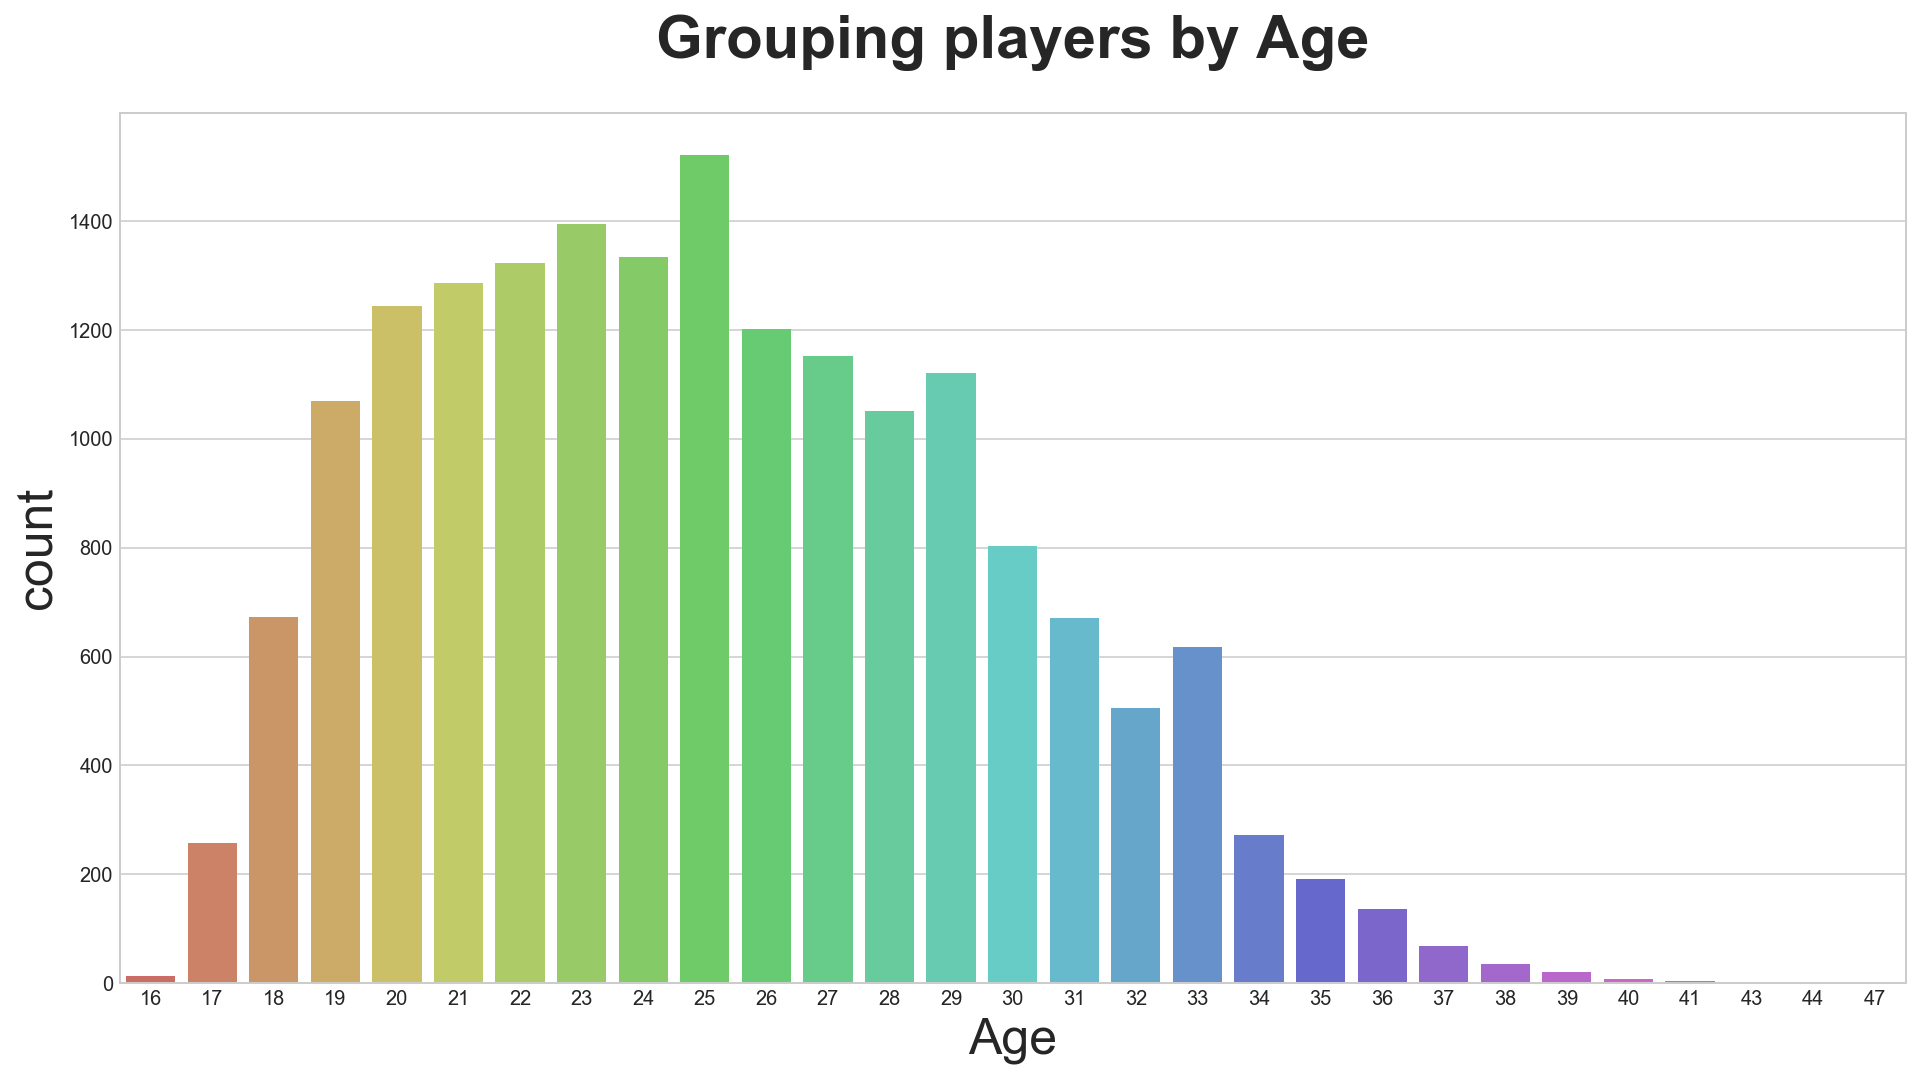

In [10]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=FIFA18, palette="hls");
plt.show()

## Monto Acomulado (Miles de €)

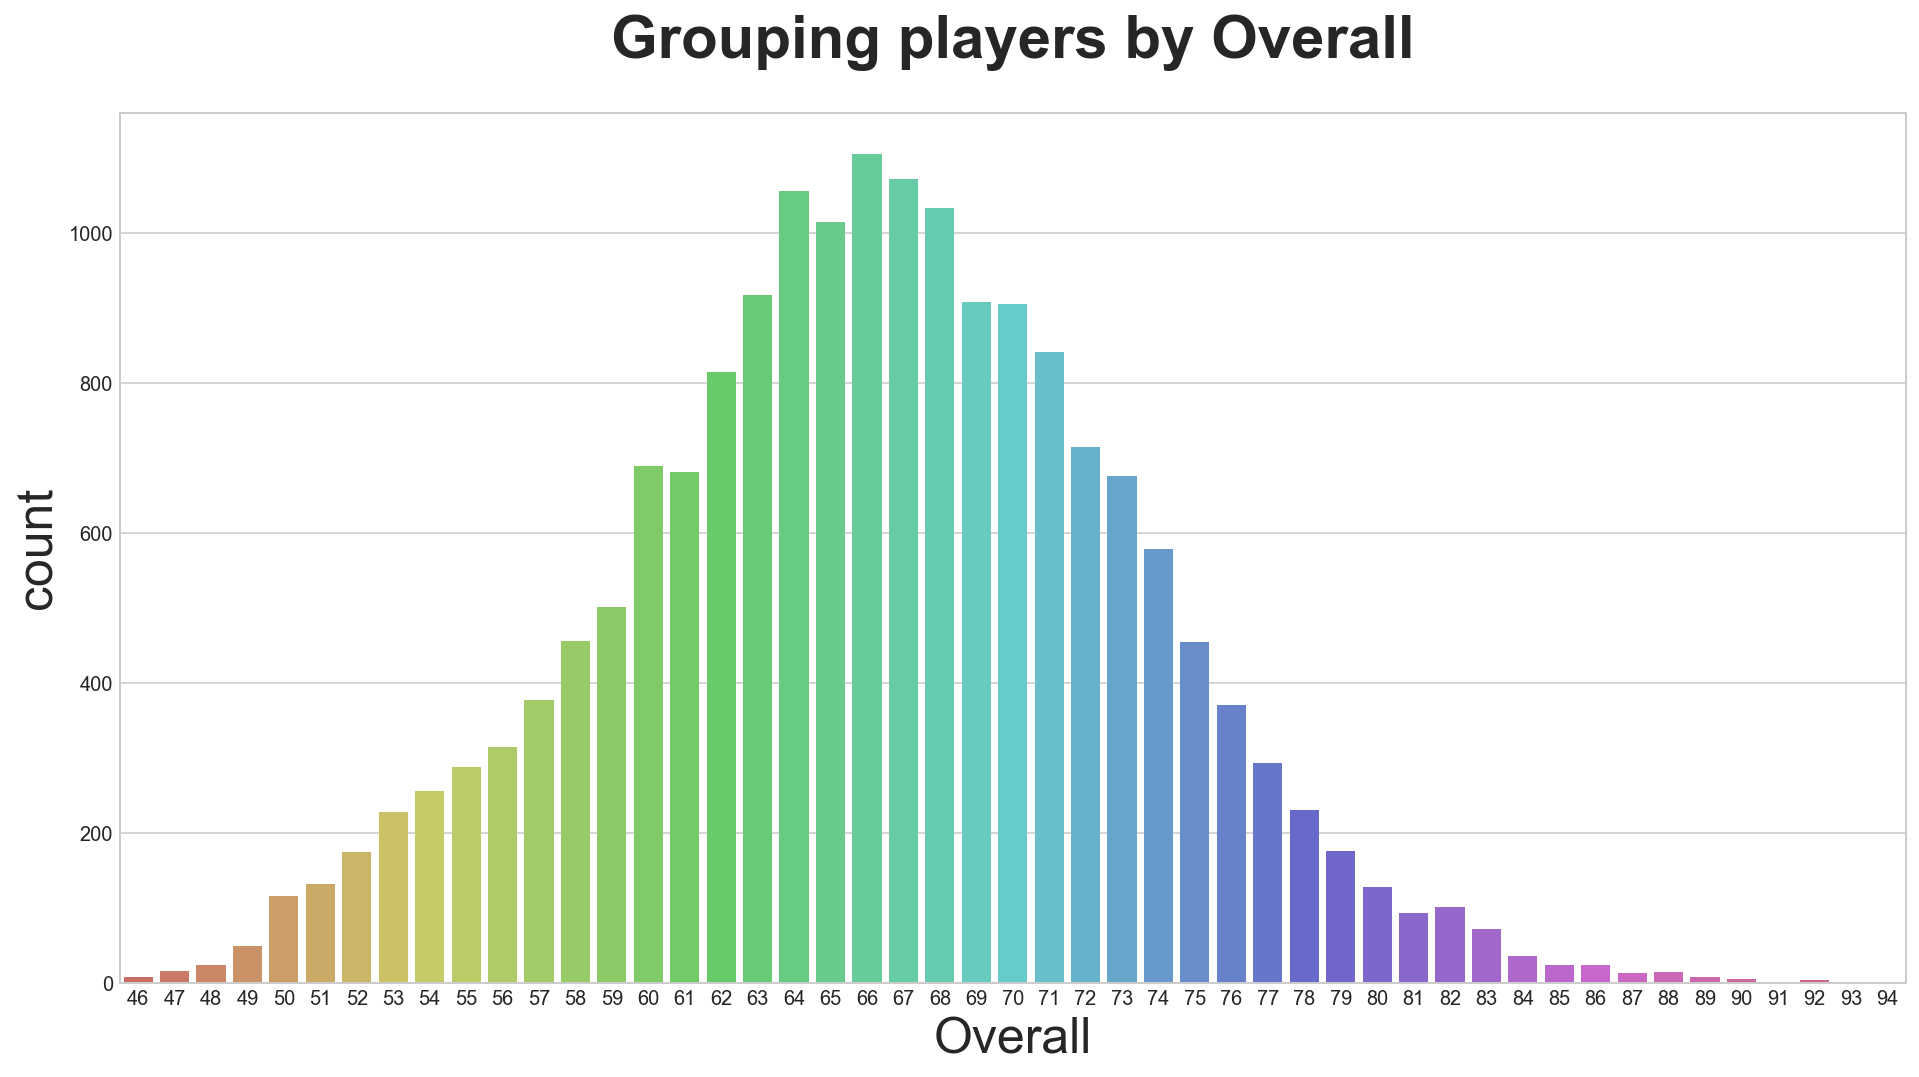

In [13]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Overall", data=FIFA18, palette="hls");
plt.show()

## Preferred Position

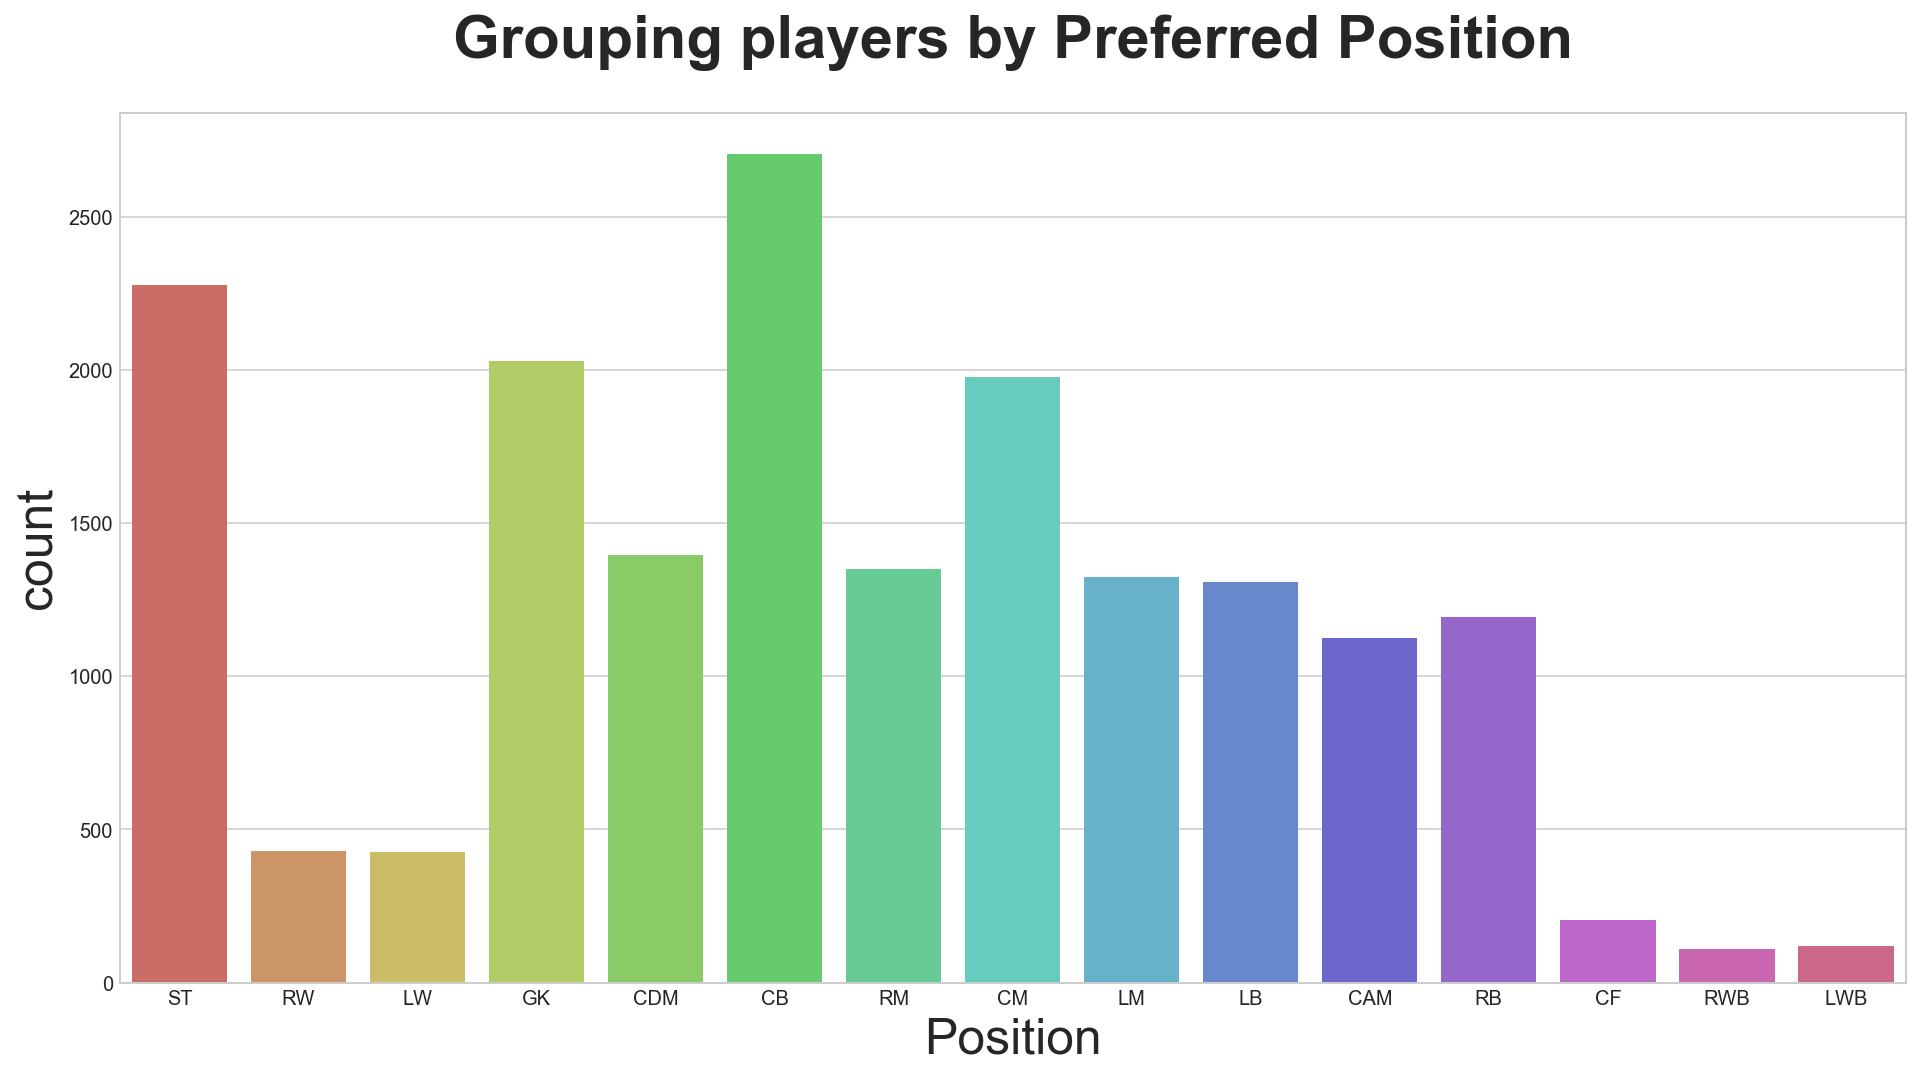

In [14]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Position", data=FIFA18, palette="hls");
plt.show()

## Nationality

In [15]:
FIFA18["Nationality"].value_counts().head(25)

England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Saudi Arabia            329
Russia                  306
Scotland                300
Turkey                  291
Belgium                 272
Name: Nationality, dtype: int64

Podemos destacar que una gran cantidad se centraliza en Europa, especialmente en Inglaterra, Alemania, España y Francia

## Value
Buscamos y listamos a los 20 jugadores que más cobran Netamente

In [16]:
sorted_players = FIFA18.sort_values(["ValueNum"], ascending=False).head(20)
sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]].reset_index(drop=True)

,Name,Age,Nationality,Club,Position,Value
0,Neymar,25,Brazil,Paris Saint-Germain,LW,€123M
1,L. Messi,30,Argentina,FC Barcelona,RW,€105M
2,L. Suárez,30,Uruguay,FC Barcelona,ST,€97M
3,Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€95.5M
4,R. Lewandowski,28,Poland,FC Bayern Munich,ST,€92M
5,E. Hazard,26,Belgium,Chelsea,LW,€90.5M
6,K. De Bruyne,26,Belgium,Manchester City,RM,€83M
7,T. Kroos,27,Germany,Real Madrid CF,CDM,€79M
8,P. Dybala,23,Argentina,Juventus,ST,€79M
9,G. Higuaín,29,Argentina,Juventus,ST,€77M


Realizamos una vista de disperción de la valoración del jugador por sus edades e ingresos:

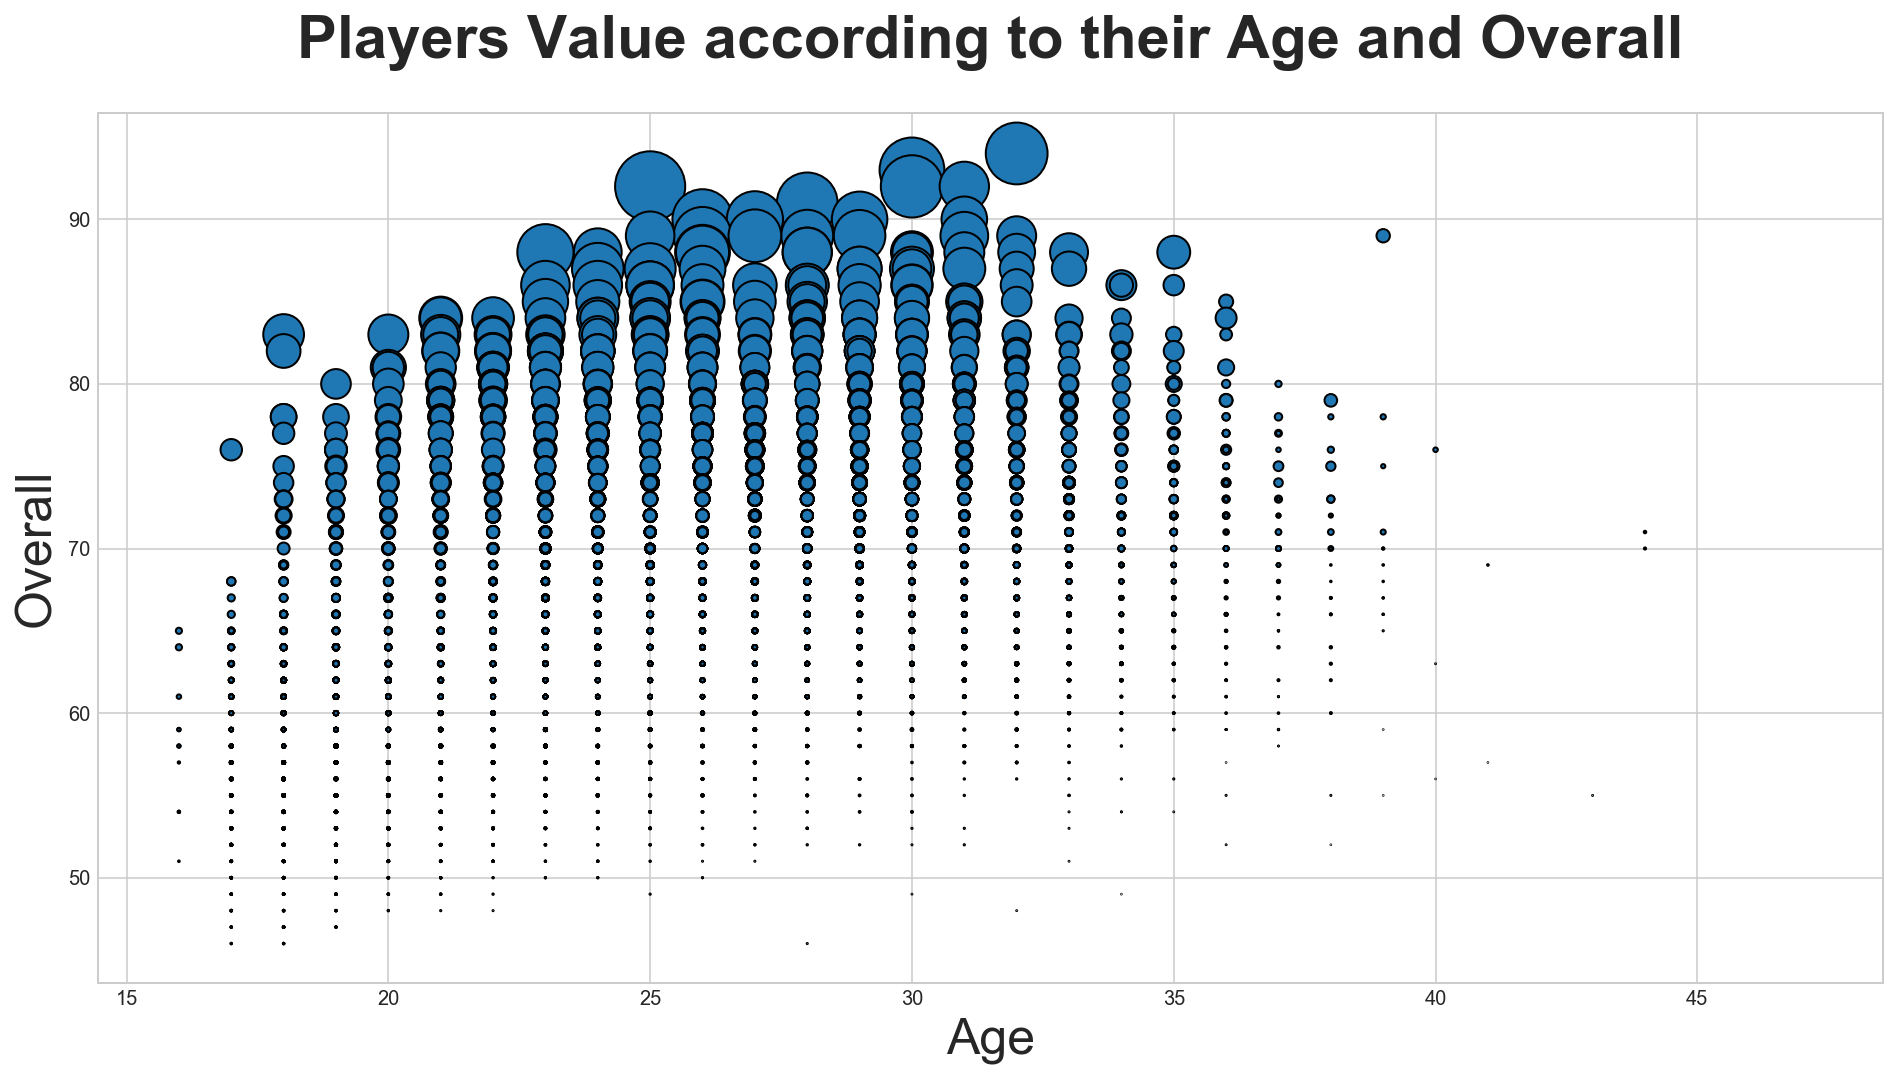

In [11]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["ValueNum"].values

# Subdividimos los millones para tener una vista legible mediante el área de la ganancia
plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

### 2.6 Wage
Listamos a los 20 jugadores con más recaudación.

In [18]:
sorted_players = FIFA18.sort_values(["WageNum"], ascending=False).head(20)
sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Wage"]].reset_index(drop=True)

,Name,Age,Nationality,Club,Position,Wage
0,Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€565K
1,L. Messi,30,Argentina,FC Barcelona,RW,€565K
2,L. Suárez,30,Uruguay,FC Barcelona,ST,€510K
3,G. Bale,27,Wales,Real Madrid CF,RW,€370K
4,R. Lewandowski,28,Poland,FC Bayern Munich,ST,€355K
5,L. Modrić,31,Croatia,Real Madrid CF,CDM,€340K
6,T. Kroos,27,Germany,Real Madrid CF,CDM,€340K
7,S. Agüero,29,Argentina,Manchester City,ST,€325K
8,Sergio Ramos,31,Spain,Real Madrid CF,CB,€310K
9,E. Hazard,26,Belgium,Chelsea,LW,€295K


Realizamos una vista de disperción de ingresos del jugador por sus edades y Valoración:

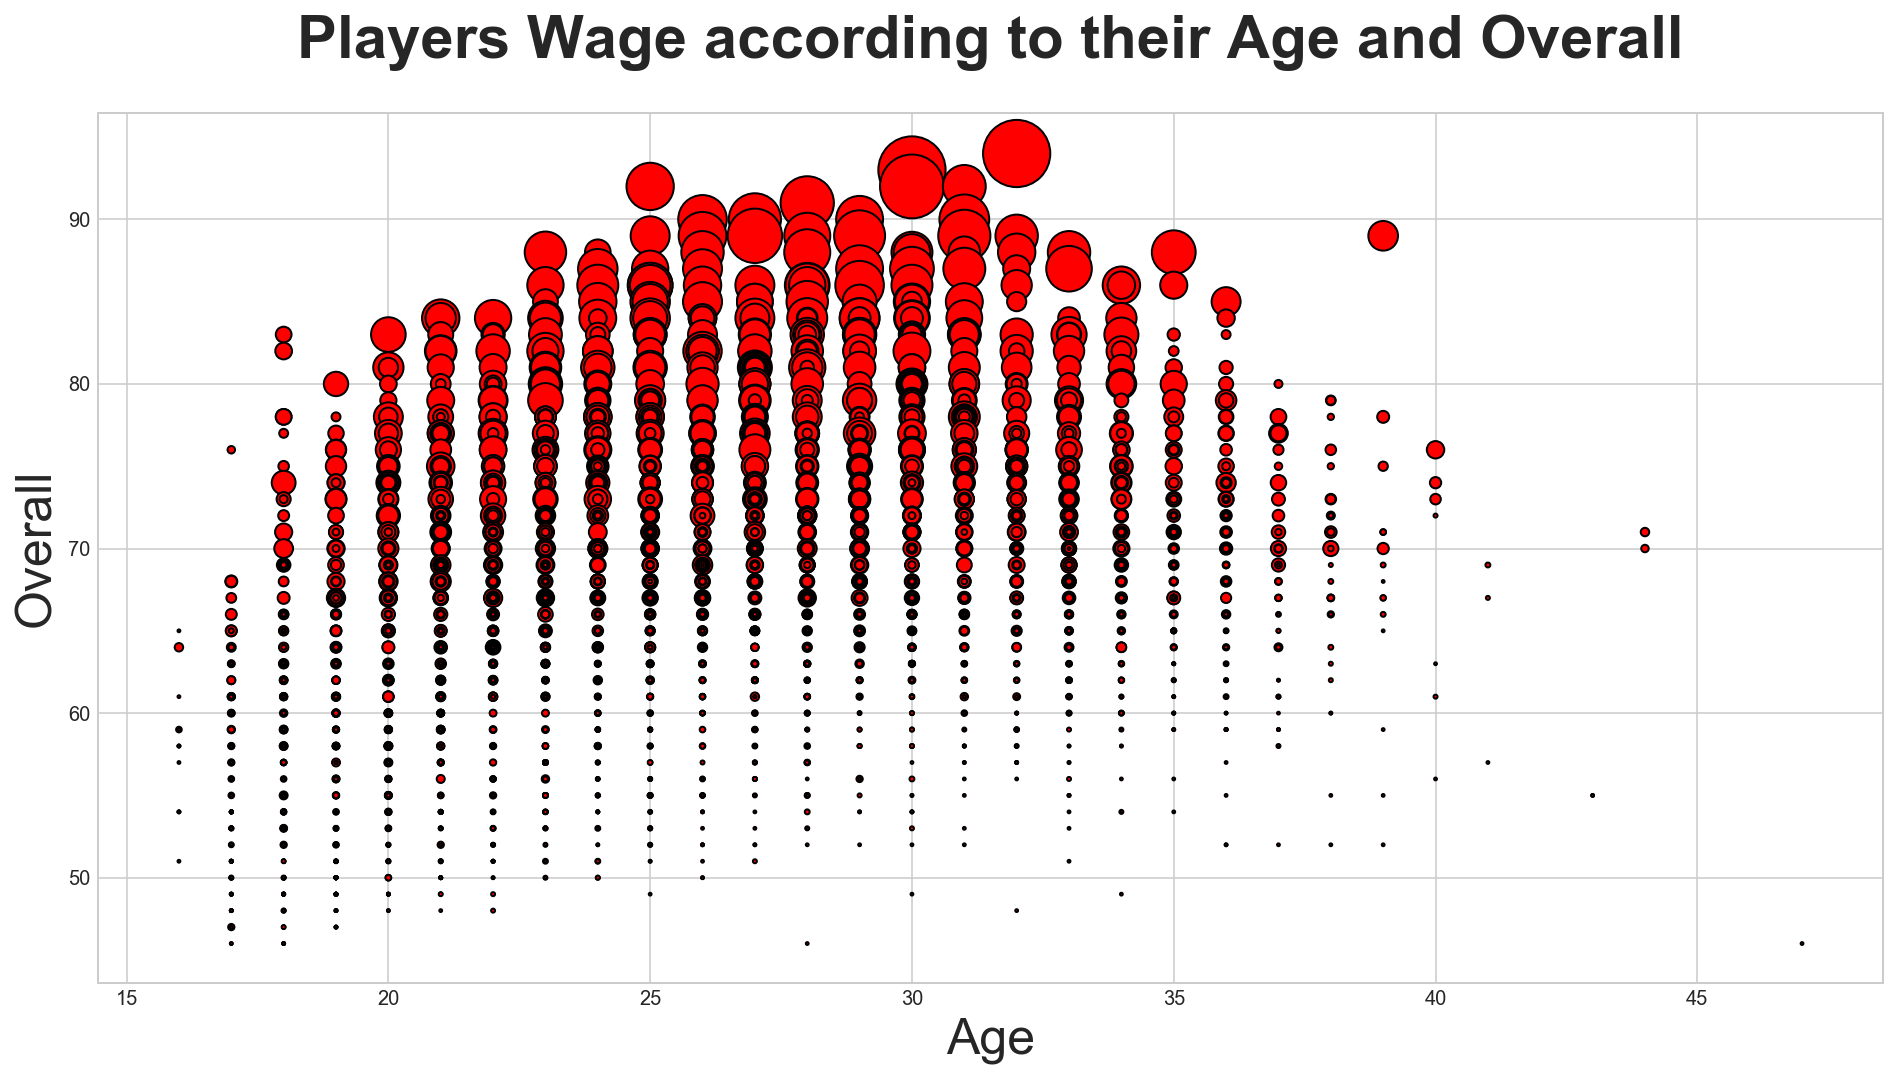

In [19]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

## 3 - Best Squad Analysis
Seleccionamos una vista más simplee de los jugadores: Nombre, Edad, Nacionalidad, Valoración, Potencial, Club al que actualmente pertenece(puede estar en blanco),Posición, Recaudación, y Salario.

In [20]:
FIFA18 = FIFA18[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FIFA18.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,ST,€95.5M,€565K
1,L. Messi,30,Argentina,93,93,FC Barcelona,RW,€105M,€565K
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,LW,€123M,€280K
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,ST,€97M,€510K
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,GK,€61M,€230K
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,ST,€92M,€355K
6,De Gea,26,Spain,90,92,Manchester United,GK,€64.5M,€215K
7,E. Hazard,26,Belgium,90,91,Chelsea,LW,€90.5M,€295K
8,T. Kroos,27,Germany,90,90,Real Madrid CF,CDM,€79M,€340K
9,G. Higuaín,29,Argentina,90,90,Juventus,ST,€77M,€275K


### 3.1 Squad of Highest Overall Players
Cúal es la mejor formación deacuerdo a base de hechos de la FIFA?

In [21]:
def get_best_squad(formation):
    FIFA18_copy = FIFA18.copy()
    store = []
    
    for i in formation:
        store.append([
            i,
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax(), 
                         inplace = True)
    
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [22]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position             Player Overall Age                 Club   Value   Wage
     GK           M. Neuer      92  31     FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25       Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31       Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32             Juventus    €38M  €225K
     LB            Marcelo      87  29       Real Madrid CF    €38M  €250K
    CDM           T. Kroos      90  27       Real Madrid CF    €79M  €340K
     CM           N. Kanté      87  26              Chelsea  €52.5M  €190K
    CAM           Coutinho      86  25            Liverpool    €56M  €205K
     RW           L. Messi      93  30         FC Barcelona   €105M  €565K
     ST  Cristiano Ronaldo      94  32       Real Madrid CF  €95.5M  €565K
     LW             Neymar      92  25  Paris Saint-Germain   €123M  €280K


In [23]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position             Player Overall Age               Club   Value   Wage
     GK           M. Neuer      92  31   FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25     Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31     Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32           Juventus    €38M  €225K
     LB            Marcelo      87  29     Real Madrid CF    €38M  €250K
     RM       K. De Bruyne      89  26    Manchester City    €83M  €285K
     CM           N. Kanté      87  26            Chelsea  €52.5M  €190K
     CM           A. Vidal      87  30   FC Bayern Munich  €37.5M  €160K
     LM         C. Eriksen      87  25  Tottenham Hotspur    €65M  €165K
     ST  Cristiano Ronaldo      94  32     Real Madrid CF  €95.5M  €565K
     ST          L. Suárez      92  30       FC Barcelona    €97M  €510K


In [24]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position             Player Overall Age              Club   Value   Wage
     GK           M. Neuer      92  31  FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25    Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31    Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32          Juventus    €38M  €225K
     LB            Marcelo      87  29    Real Madrid CF    €38M  €250K
    CDM           T. Kroos      90  27    Real Madrid CF    €79M  €340K
    CDM          L. Modrić      89  31    Real Madrid CF    €57M  €340K
    CAM           Coutinho      86  25         Liverpool    €56M  €205K
    CAM      R. Nainggolan      86  29              Roma  €42.5M  €130K
    CAM      Cesc Fàbregas      86  30           Chelsea    €41M  €210K
     ST  Cristiano Ronaldo      94  32    Real Madrid CF  €95.5M  €565K


Ahora, veamos diferentes posiciones para distintos features.

In [25]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FIFA18_copy = FIFA18.copy()
    FIFA18_copy = FIFA18_copy[FIFA18_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [26]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

Para cada formación indicamos la mejor estratégia, sin violar las reglas fundamentales del juego. Ejm: 1 portero, etc,etc.

In [27]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [28]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

# 3 Group C
## 3.1 France

Extramos diferentes posiciónes que pueden generarse para Francia, juntamente con el promedio que generan y sus ratings.

In [29]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), 
                      columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

France

,Squad,Overall,Potential
Nationality,,,
France,3-4-3,84.55,89.55
France,4-4-2,84.00,89.91
France,4-3-1-2,84.55,89.64
France,4-3-3,84.64,89.91
France,4-2-3-1,84.55,89.91


Veamos, la mejor estratégia para Francia sería usar 4-3-3; mientra que las estratégias 4-4-2, and 4-2-3-1 son las que le siguen en dicho orden. Los mejores 11 con una estratégia 4-3-3 brinda actualmente sus mejores partidos hasta la fecha, pero mientras una alineación 4-4-2 le brinda mayor potencial máximo.

In [30]:
rating_433_FR_Overall, best_list_433_FR_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 84.6
Position        Player Overall Age                     Club   Value   Wage
     GK     H. Lloris      88  30        Tottenham Hotspur    €38M  €165K
     RB      K. Zouma      79  22               Stoke City    €15M   €96K
     CB     R. Varane      85  24           Real Madrid CF  €46.5M  €175K
     CB    A. Laporte      84  23  Athletic Club de Bilbao  €35.5M   €36K
     LB    L. Kurzawa      80  24      Paris Saint-Germain  €16.5M   €69K
     CM      N. Kanté      87  26                  Chelsea  €52.5M  €190K
    CDM      P. Pogba      87  24        Manchester United  €66.5M  €195K
     CM    B. Matuidi      85  30                 Juventus  €28.5M  €145K
     RM    F. Thauvin      82  24   Olympique de Marseille    €28M   €40K
     ST    K. Benzema      86  29           Real Madrid CF  €44.5M  €295K
     LW  A. Griezmann      88  26          Atlético Madrid    €75M  €150K


In [31]:
rating_442_FR_Potential, best_list_442_FR_Potential = get_best_squad_n(squad_442_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_FR_Potential))
print(best_list_442_FR_Potential)

-Potential-
Average rating: 89.9
Position        Player Potential Age                     Club   Value   Wage
     GK     A. Lafont        89  18              Toulouse FC  €11.5M   €10K
     RB      K. Zouma        86  22               Stoke City    €15M   €96K
     CB     R. Varane        92  24           Real Madrid CF  €46.5M  €175K
     CB    A. Laporte        89  23  Athletic Club de Bilbao  €35.5M   €36K
     LB  L. Hernández        88  21          Atlético Madrid  €13.5M   €36K
     RM       A. Pléa        86  24                 OGC Nice  €20.5M   €41K
    CDM      P. Pogba        92  24        Manchester United  €66.5M  €195K
    CAM    O. Dembélé        92  20             FC Barcelona    €40M  €150K
     LM      T. Lemar        91  21                AS Monaco  €38.5M   €37K
     ST     K. Mbappé        94  18      Paris Saint-Germain  €41.5M   €31K
     ST    A. Martial        90  21        Manchester United    €33M  €115K


![griezmann](snapshot/griezmann.jpeg)

## 3.2 Denmark
Extramos diferentes posiciónes que pueden generarse para Dinamarca, juntamente con el promedio que generan y sus ratings.

In [32]:
Denmark = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Denmark'])).reshape(-1,4),
                       columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Denmark.set_index('Nationality', inplace = True)
Denmark[['Overall', 'Potential']] = Denmark[['Overall', 'Potential']].astype(float)

Denmark

,Squad,Overall,Potential
Nationality,,,
Denmark,3-4-3,79.09,83.36
Denmark,4-4-2,79.27,84.18
Denmark,4-3-1-2,78.73,83.09
Denmark,4-3-3,79.55,84.27
Denmark,4-2-3-1,79.55,84.18


Como podemos apreciar tenemos dos picos de estratégias, la formación 4-2-3-1 o 4-3-3; usando el feature 'Potential', podemos indicar que su mejor es usar 4-3-3. La cual indica que nuestro mejor score en general es 79.55, con un potencial máximo de 84.27

In [33]:
rating_433_DEN_Overall, best_list_433_DEN_Overall = get_best_squad_n(squad_433_strict, 'Denmark', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_DEN_Overall))
print(best_list_433_DEN_Overall)

-Overall-
Average rating: 79.5
Position          Player Overall Age                      Club   Value   Wage
     GK   K. Schmeichel      83  30            Leicester City    €19M   €65K
     RB     F. Sørensen      77  25                1. FC Köln   €9.5M   €33K
     CB         S. Kjær      81  28                Sevilla FC    €16M   €23K
     CB  J. Vestergaard      79  24  Borussia Mönchengladbach  €14.5M   €36K
    LWB      R. Durmisi      73  23       Real Betis Balompié   €4.7M   €18K
    CDM  A. Christensen      81  21                   Chelsea    €23M   €86K
    CAM         D. Wass      80  28          RC Celta de Vigo  €14.5M   €33K
     CM  M. Krohn-Dehli      79  34                Sevilla FC   €6.5M   €24K
     RM     L. Andersen      76  22   Grasshopper Club Zürich    €11M   €21K
     ST    N. Jørgensen      79  26                 Feyenoord  €15.5M   €25K
     LM      C. Eriksen      87  25         Tottenham Hotspur    €65M  €165K


In [34]:
rating_433_DEN_Potential, best_list_433_DEN_Potential = get_best_squad_n(squad_433_strict, 'Denmark', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_DEN_Potential))
print(best_list_433_DEN_Potential)

-Potential-
Average rating: 84.3
Position          Player Potential Age                      Club   Value   Wage
     GK   K. Schmeichel        84  30            Leicester City    €19M   €65K
     RB     F. Sørensen        81  25                1. FC Köln   €9.5M   €33K
     CB  J. Vestergaard        84  24  Borussia Mönchengladbach  €14.5M   €36K
     CB         S. Kjær        82  28                Sevilla FC    €16M   €23K
    LWB      R. Durmisi        80  23       Real Betis Balompié   €4.7M   €18K
    CDM  A. Christensen        89  21                   Chelsea    €23M   €86K
    CAM      K. Dolberg        88  19                      Ajax  €16.5M   €10K
    CAM      V. Fischer        82  23           1. FSV Mainz 05   €9.5M   €23K
     RM     L. Andersen        83  22   Grasshopper Club Zürich    €11M   €21K
     ST      Y. Poulsen        83  23                RB Leipzig    €11M   €58K
     LM      C. Eriksen        91  25         Tottenham Hotspur    €65M  €165K


![schmeichel](snapshot/schmeichel.jpg)

## 3.3 Peru
Extramos diferentes posiciónes que pueden generarse para Perú, juntamente con el promedio que generan y sus ratings.

In [35]:
Peru = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Peru'])).reshape(-1,4),
                    columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Peru.set_index('Nationality', inplace = True)
Peru[['Overall', 'Potential']] = Peru[['Overall', 'Potential']].astype(float)

Peru

,Squad,Overall,Potential
Nationality,,,
Peru,3-4-3,73.09,75.91
Peru,4-4-2,73.91,76.27
Peru,4-3-1-2,71.82,75.36
Peru,4-3-3,73.09,76.09
Peru,4-2-3-1,72.91,76.09


Para nuestro Perú, tenemos con una puntuación general la formación 4-4-2 . De la misma forma su potencial se inclina ccon 76.27 sobre la media, seleccionando como esta la mejor formación que hoy en día cuenta.

In [36]:
rating_442_PER_Overall, best_list_442_PER_Overall = get_best_squad_n(squad_442_strict, 'Peru', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_PER_Overall))
print(best_list_442_PER_Overall)

-Overall-
Average rating: 73.9
Position        Player Overall Age                      Club   Value  Wage
     GK    P. Gallese      74  27                       NaN      €0    €0
    RWB   R. Revoredo      70  31                       NaN      €0    €0
     CB   C. Zambrano      76  27         PAOK Thessaloniki   €7.5M   €1K
     CB  A. Rodríguez      73  33                       NaN      €0    €0
     LB      Y. Yotún      71  27  Orlando City Soccer Club   €2.7M   €7K
     RM    P. Hurtado      76  26         Vitória Guimarães   €8.5M  €14K
    CDM      R. Tapia      72  21                 Feyenoord   €4.2M   €9K
    CAM      Y. Reyna      70  23    Vancouver Whitecaps FC   €2.4M   €6K
     LM   A. Carrillo      77  26                   Watford  €10.5M  €15K
     ST     J. Farfán      78  32          Lokomotiv Moscow     €8M  €45K
     ST    R. Ruidíaz      76  26          Monarcas Morelia     €9M  €16K


In [37]:
rating_442_PER_Potential, best_list_442_PER_Potential = get_best_squad_n(squad_442_strict, 'Peru', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_PER_Potential))
print(best_list_442_PER_Potential)

-Potential-
Average rating: 76.3
Position       Player Potential Age                         Club   Value  Wage
     GK   P. Gallese        76  27                          NaN      €0    €0
    RWB  R. Revoredo        70  31                          NaN      €0    €0
     CB  C. Zambrano        78  27            PAOK Thessaloniki   €7.5M   €1K
     CB   A. Callens        78  25  New York City Football Club   €3.6M   €6K
     LB     Y. Yotún        72  27     Orlando City Soccer Club   €2.7M   €7K
     RM      A. Polo        79  22             Monarcas Morelia   €1.7M   €6K
    CDM     R. Tapia        78  21                    Feyenoord   €4.2M   €9K
    CAM     Y. Reyna        75  23       Vancouver Whitecaps FC   €2.4M   €6K
     LM  A. Carrillo        78  26                      Watford  €10.5M  €15K
     ST    J. Farfán        78  32             Lokomotiv Moscow     €8M  €45K
     ST   R. Ruidíaz        77  26             Monarcas Morelia     €9M  €16K


Pondré una foto del Capitan a pesar que no este en esta data ;)
![paolo](snapshot/paolo.jpg)

## 3.5 Australia
Extramos diferentes posiciónes que pueden generarse para Australia, juntamente con el promedio que generan y sus ratings.

In [38]:
Australia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Australia'])).reshape(-1,4), 
                      columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Australia.set_index('Nationality', inplace = True)
Australia[['Overall', 'Potential']] = Australia[['Overall', 'Potential']].astype(float)

Australia

,Squad,Overall,Potential
Nationality,,,
Australia,3-4-3,72.73,77.18
Australia,4-4-2,73.00,77.09
Australia,4-3-1-2,73.73,77.64
Australia,4-3-3,73.55,77.36
Australia,4-2-3-1,73.27,77.36


De forma similar Australia tiene un score general de 73.55 con la formación 4-3-3 actualmente, por otro lado el potencial máximo que puede alcanzar usando una formación 4-2-3-1 es de 77.90

In [39]:
rating_433_AU_Overall, best_list_433_AU_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_AU_Overall))
print(best_list_433_AU_Overall)

-Overall-
Average rating: 85.5
Position         Player Overall Age                 Club   Value   Wage
     GK        Ederson      83  23      Manchester City    €26M   €87K
     RB     Dani Alves      84  34  Paris Saint-Germain     €9M  €115K
     CB   Thiago Silva      88  32  Paris Saint-Germain    €34M  €175K
     CB     David Luiz      86  30              Chelsea    €33M  €190K
     LB        Marcelo      87  29       Real Madrid CF    €38M  €250K
    CDM       Casemiro      85  25       Real Madrid CF    €42M  €195K
    CAM       Coutinho      86  25            Liverpool    €56M  €205K
    CAM        Willian      84  28              Chelsea  €31.5M  €200K
     RM  Douglas Costa      82  26             Juventus    €24M  €115K
     CF          Jonas      83  33           SL Benfica  €16.5M   €21K
     LW         Neymar      92  25  Paris Saint-Germain   €123M  €280K


In [40]:
rating_4312_AU_Potential, best_list_4312_AU_Potential = get_best_squad_n(squad_4312_strict, 'Australia', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4312_AU_Potential))
print(best_list_4312_AU_Potential)

-Potential-
Average rating: 77.6
Position        Player Potential Age                    Club   Value  Wage
     GK       M. Ryan        80  25  Brighton & Hove Albion     €8M  €36K
     RB     A. Behich        76  26               Bursaspor   €4.1M  €17K
     CB  T. Sainsbury        77  25                     NaN      €0    €0
     CB     B. Wright        77  24            Bristol City   €2.8M  €23K
     LB   A. Gersbach        79  20            Rosenborg BK   €1.3M   €4K
     CM    A. O'Neill        80  18          Fleetwood Town   €925K   €8K
    CAM       A. Mooy        78  26       Huddersfield Town  €10.5M  €52K
    CAM      T. Rogić        77  24                  Celtic     €7M  €42K
    CAM   D. De Silva        77  20  Central Coast Mariners   €875K   €1K
     ST   J. Maclaren        77  23         SV Darmstadt 98   €5.5M  €23K
     CF    A. Taggart        76  24             Perth Glory   €1.5M   €6K


![paolo](snapshot/langerak.jpg)

## 4 - Final Comparison

A continuación muestro mediante barrras las puntuciones totales y potencial máximo, para tener una mejor panorama.

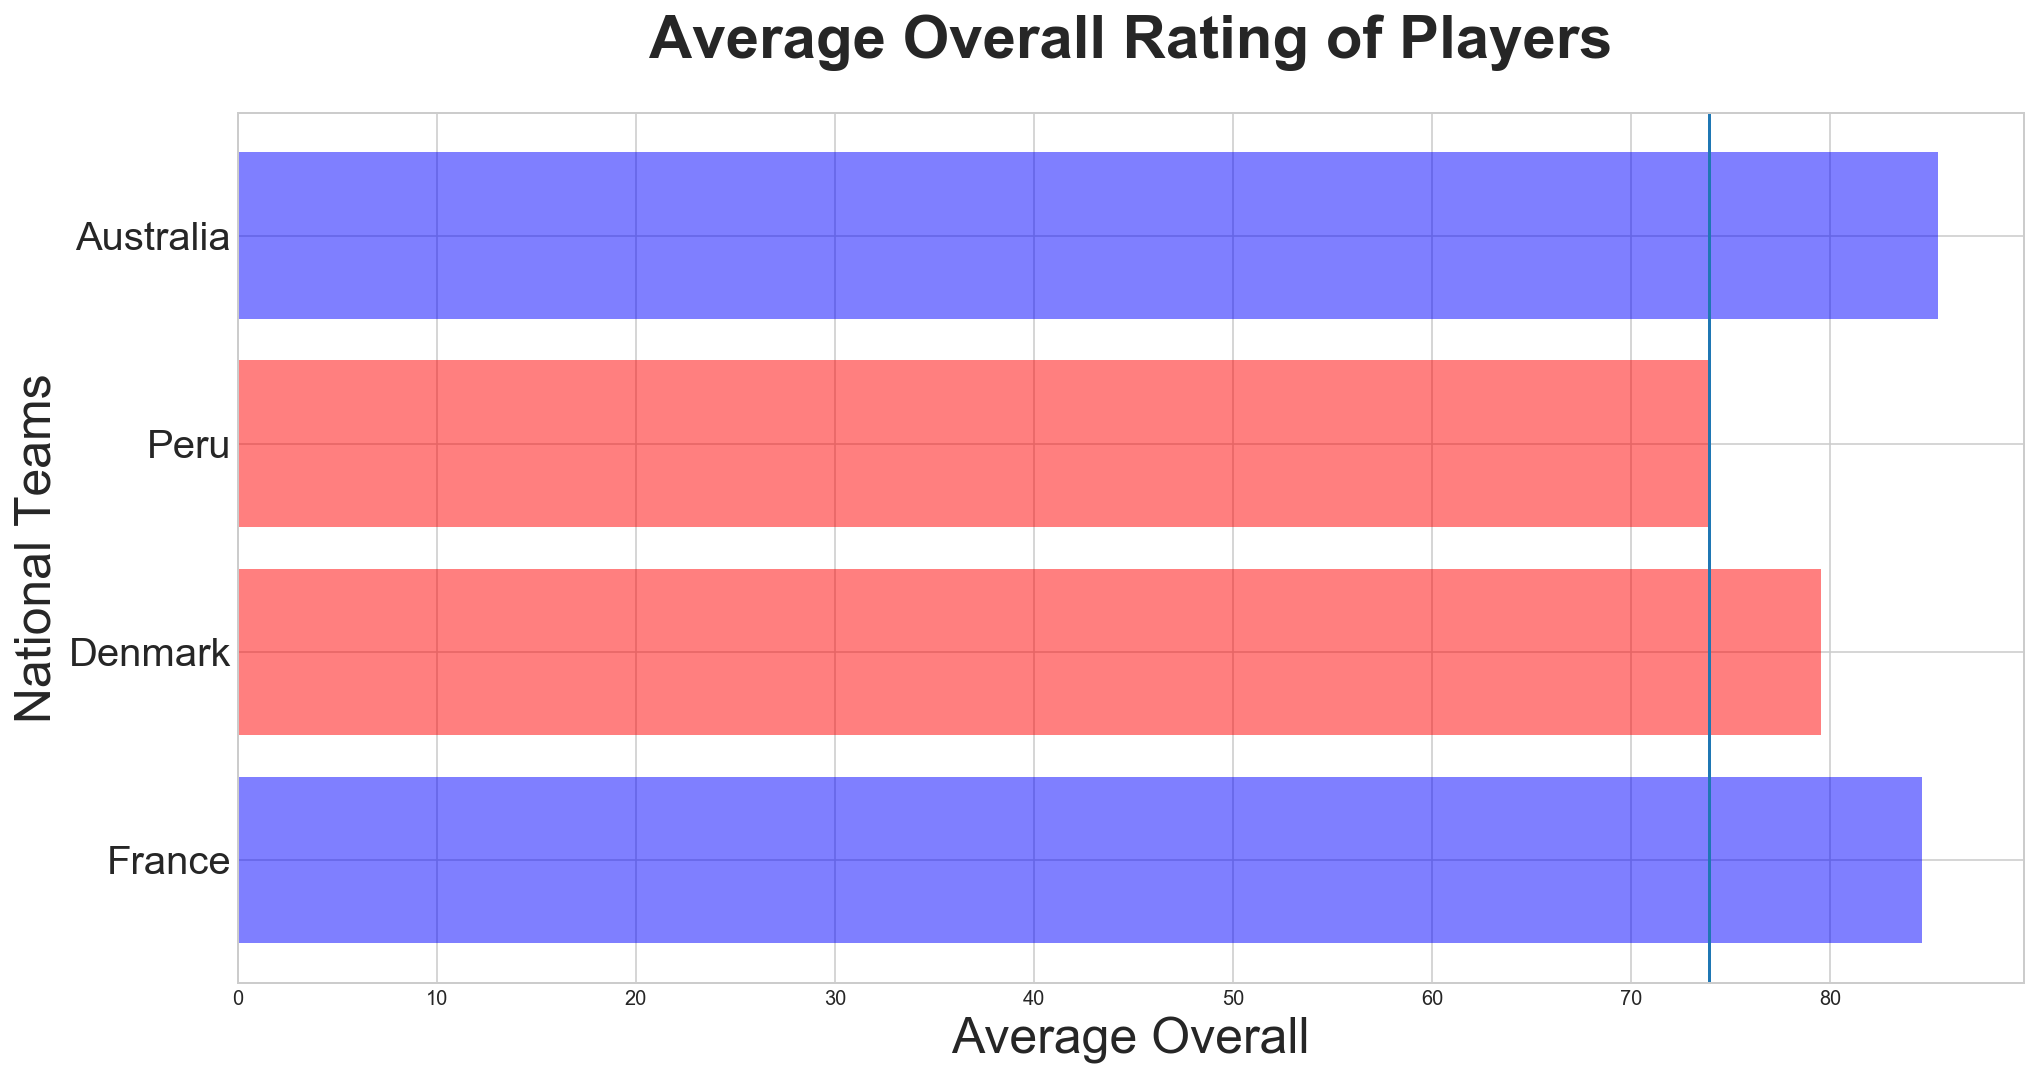

In [41]:
teams = ('France', 'Denmark', 'Peru', 'Australia')
index = np.arange(len(teams))
average_overall = [rating_433_FR_Overall, rating_433_DEN_Overall, rating_442_PER_Overall,rating_433_AU_Overall]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5,color='brrb')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.axvline(rating_442_PER_Overall)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

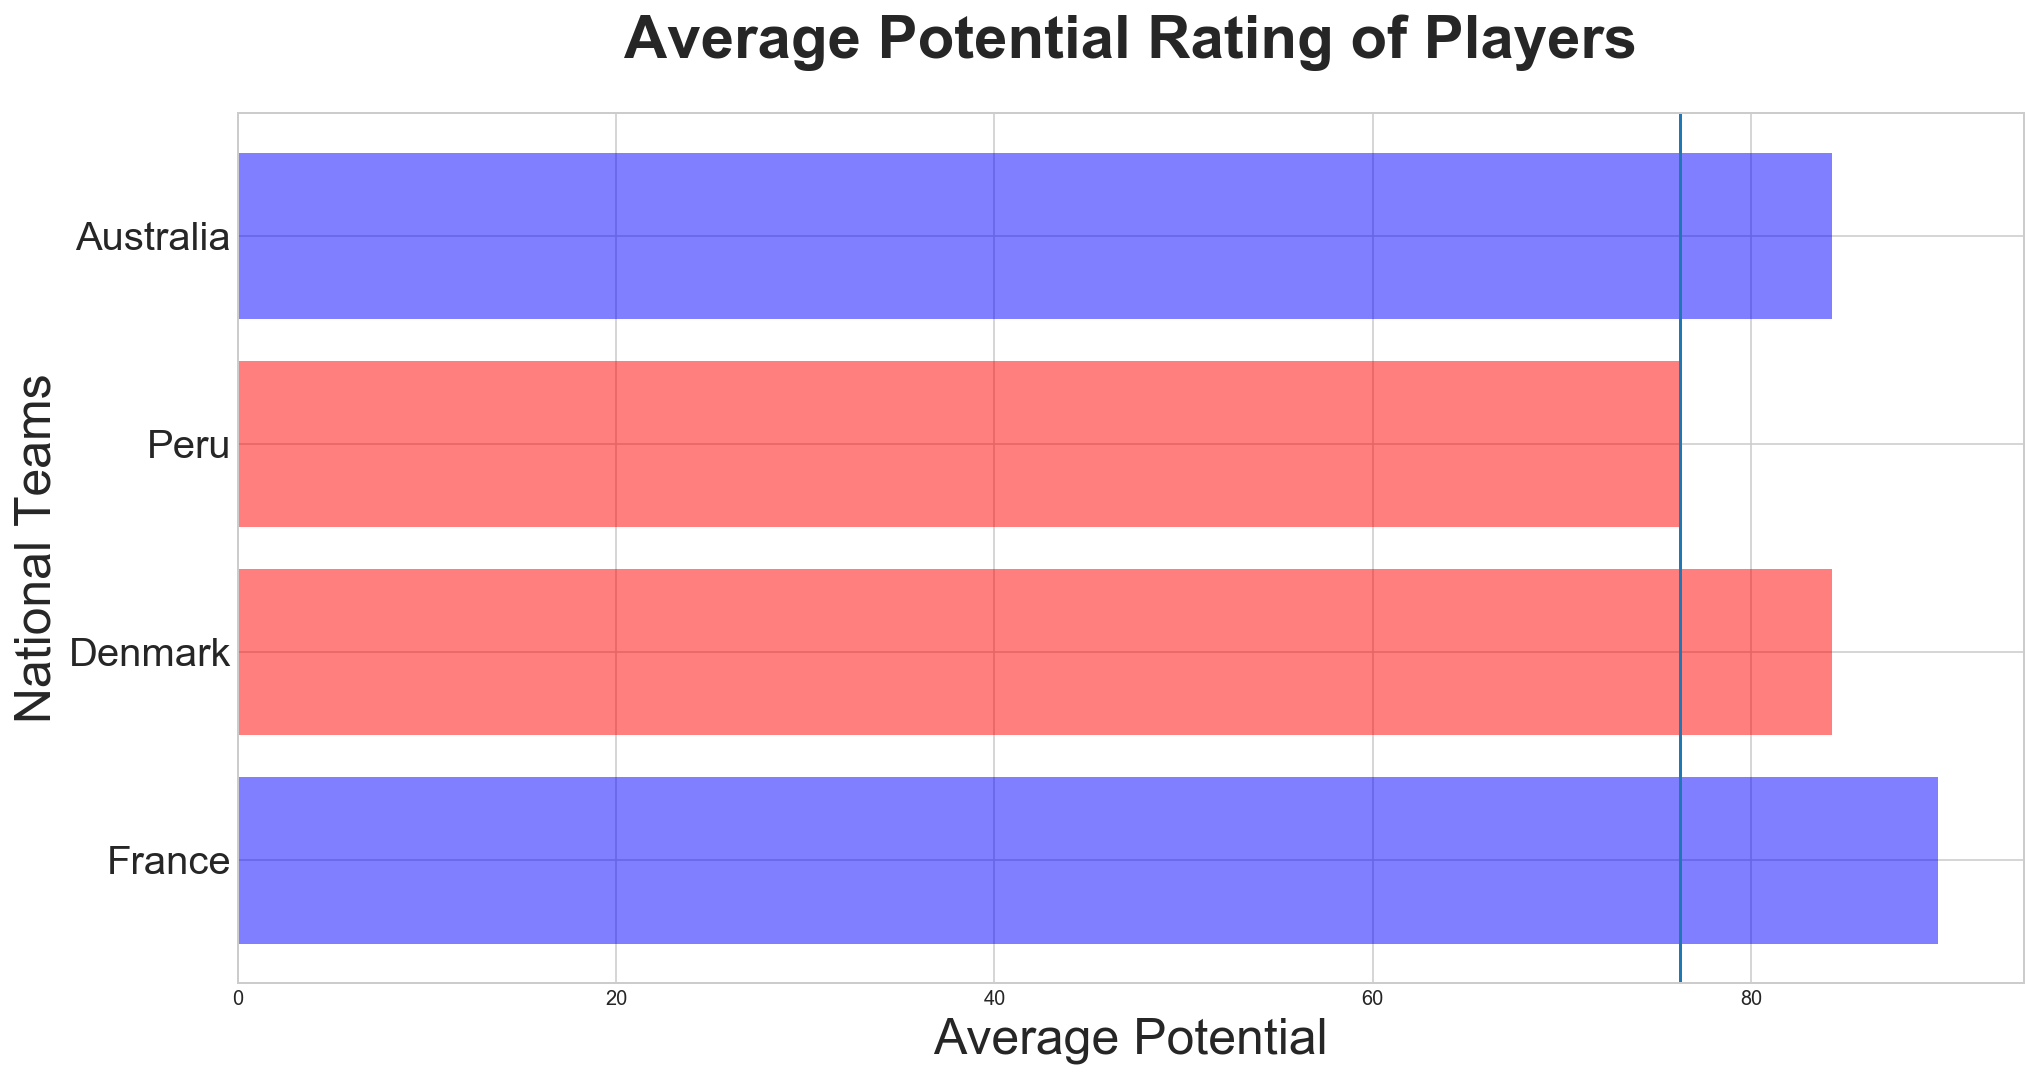

In [42]:
index = np.arange(len(teams))
average_potential = [rating_442_FR_Potential, rating_433_DEN_Potential, rating_442_PER_Potential,rating_433_DEN_Potential]

plt.figure(figsize=(16,8))
plt.barh(index, average_potential, align='center',color='brrb', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.axvline(x=rating_442_PER_Potential)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Potential', fontsize=25)
plt.title('Average Potential Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

In [46]:
GroupC_Average

,ValueNum,WageNum
Nationality,,
France,3.340557e+06,14279.141104
Denmark,1.596257e+06,7202.312139
Peru,2.178167e+06,6500.000000
Australia,7.339868e+05,4114.537445


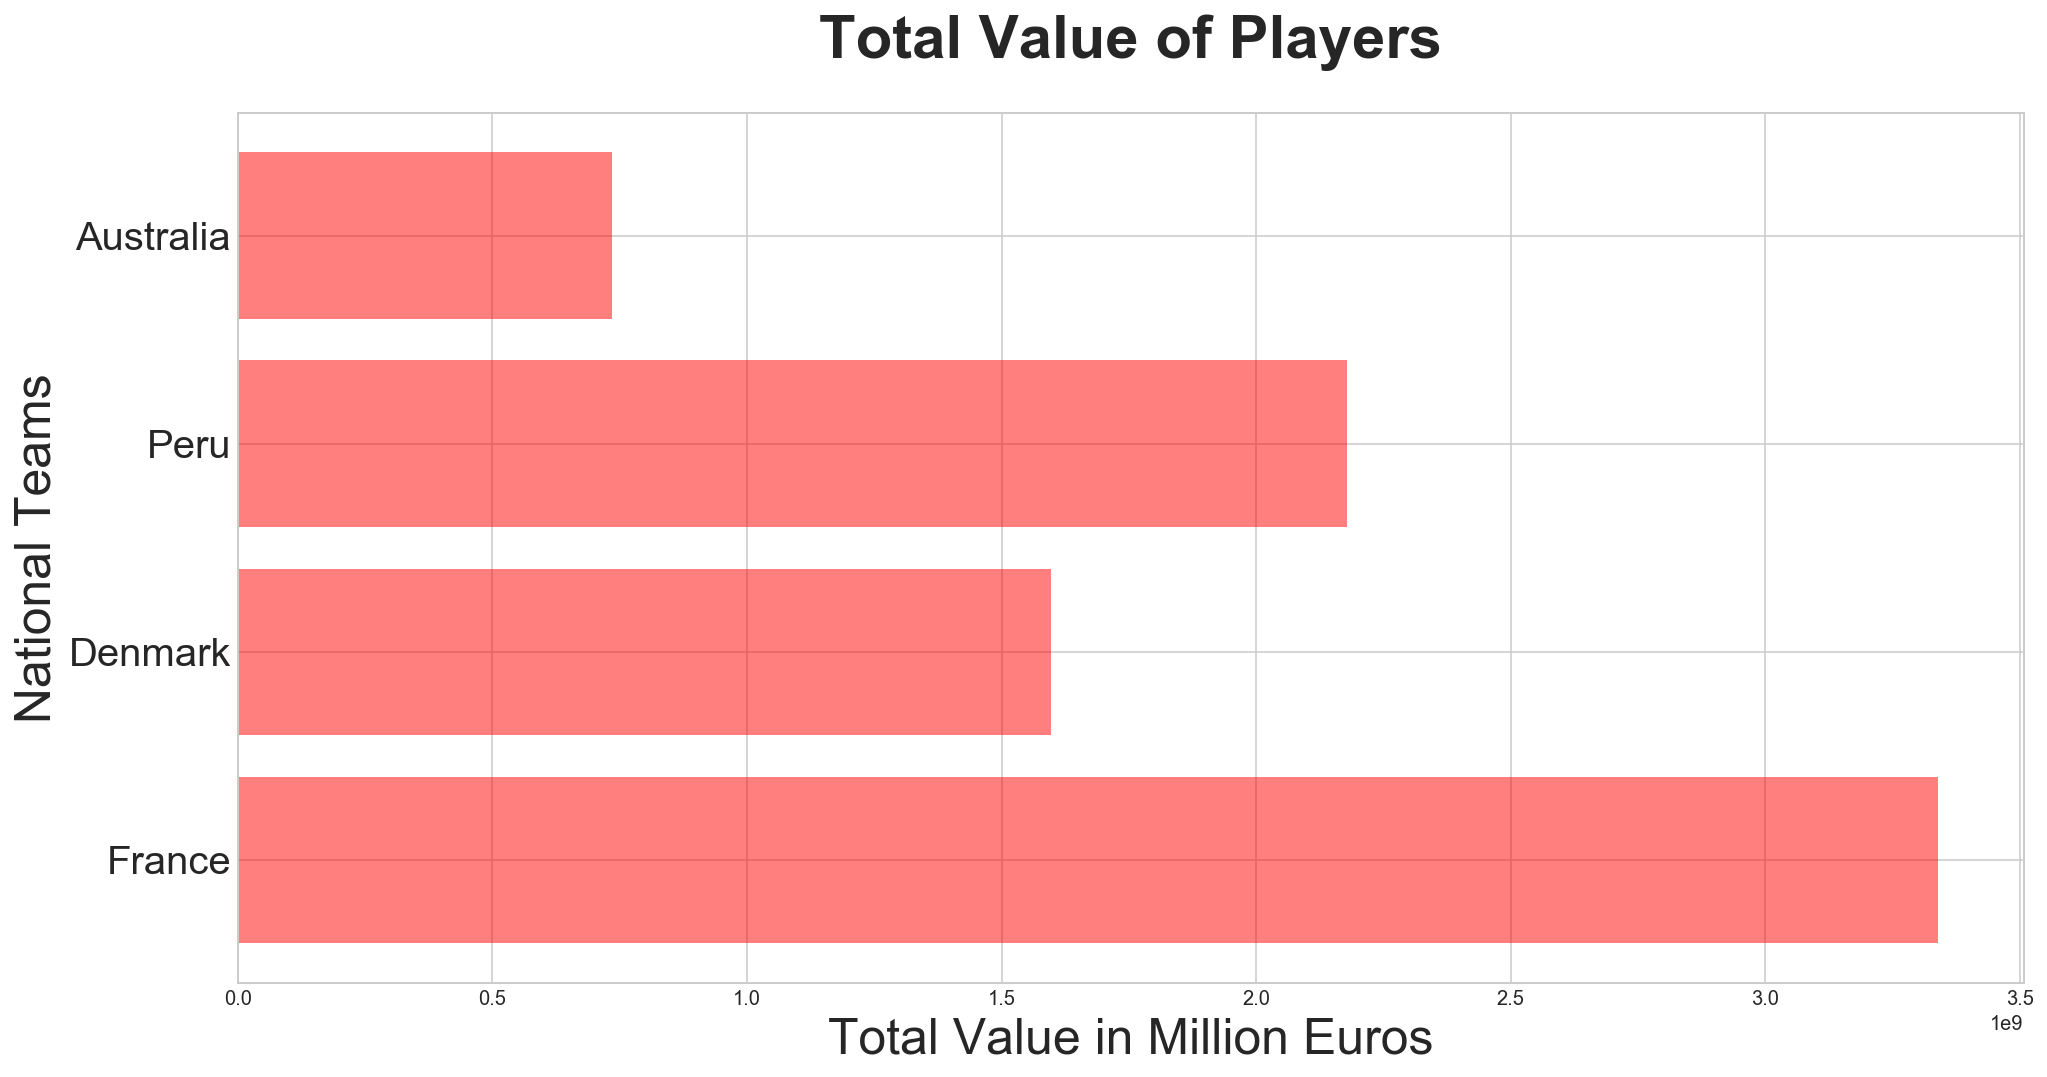

In [49]:
total_value = GroupC_Average.ValueNum.values * 1000

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

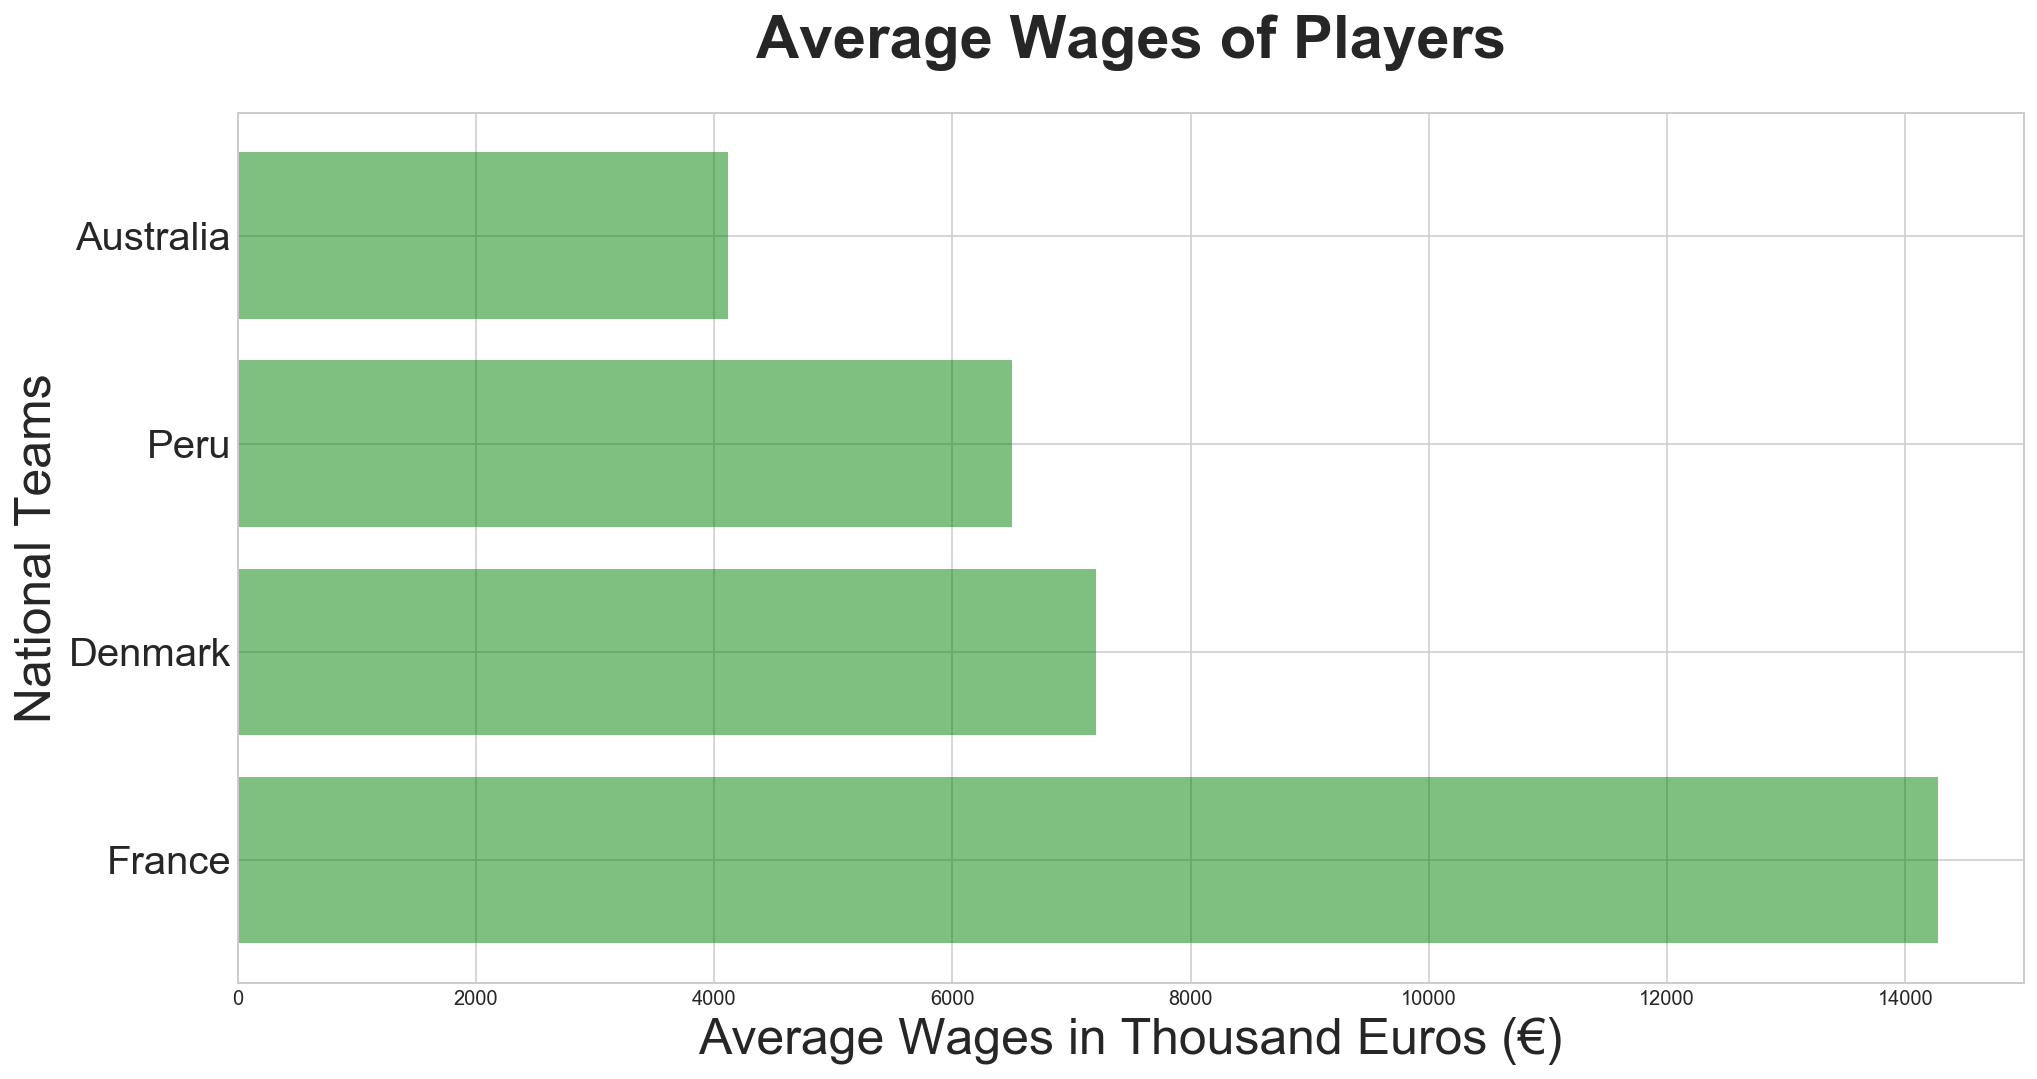

In [48]:
average_wage = GroupC_Average.WageNum.values

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.5, color='green')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros (€)', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

# Conclusion
So based purely on the FIFA 18 Data:
* France has the highest average overall rating, followed by **Australia and Denmark**. 
* France has the highest total value, followed by Peru and Denmark. 
* France has the highest average wage, followed by Peru.

My bet is for a **France & Denmark** pass the group stages, and **Peru** for the 3rd place on the **Group C**.

Thank for read this Notebook